In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('bank.csv')

In [3]:
df

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579
...,...,...,...,...,...,...
510,511,337,140,111,2640,694
511,512,168,131,60,2640,524
512,513,333,86,108,2850,676
513,514,192,176,34,2760,505


In [4]:
df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [5]:
df.columns

Index(['Bank', 'DD', 'Withdrawals', 'Deposits', 'Branch Area in sqft',
       'avg daily walkins'],
      dtype='object')

In [6]:
df=df.drop(['Bank'],axis=1)

In [7]:
df.shape

(515, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   DD                   515 non-null    int64
 1   Withdrawals          515 non-null    int64
 2   Deposits             515 non-null    int64
 3   Branch Area in sqft  515 non-null    int64
 4   avg daily walkins    515 non-null    int64
dtypes: int64(5)
memory usage: 20.2 KB


In [9]:
df.isnull().sum()

DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

<Axes: xlabel='Deposits', ylabel='Withdrawals'>

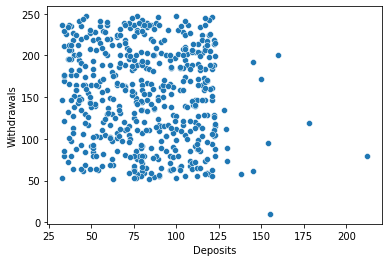

In [10]:
import seaborn as sns
sns.scatterplot(data=df,x='Deposits',y='Withdrawals')

<Axes: >

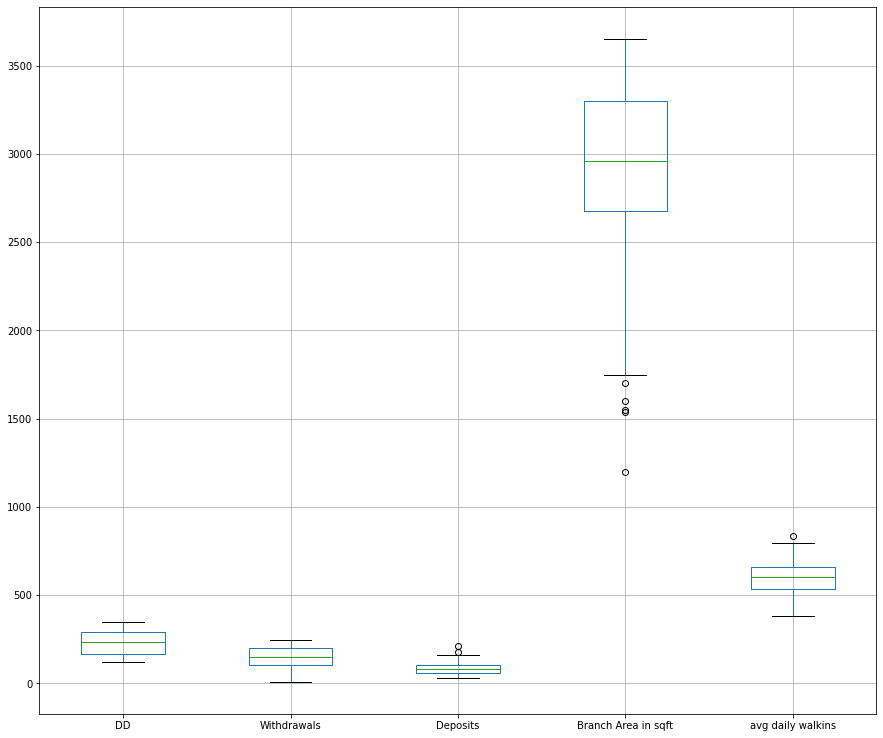

In [11]:
df.boxplot(figsize=(15,13))

In [12]:
import numpy as np
q1,q3=np.percentile(df,[25,75])
q3

657.5

In [13]:
iqr=q3-q1
iqr

538.5

In [14]:
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print(upper)
print(lower)

1465.25
-688.75


In [15]:
#df1=df[df>upper]
#df1=df[df<lower]
df1 = df[(df > lower) & (df < upper)]

In [1]:
#df1.boxplot(figsize=(15,13))

In [17]:
df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,227,147,111,2460,639
1,123,86,65,3510,436
2,306,149,76,2570,669
3,251,112,129,3650,623
4,174,135,128,3400,579
...,...,...,...,...,...
510,337,140,111,2640,694
511,168,131,60,2640,524
512,333,86,108,2850,676
513,192,176,34,2760,505


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   DD                   515 non-null    int64
 1   Withdrawals          515 non-null    int64
 2   Deposits             515 non-null    int64
 3   Branch Area in sqft  515 non-null    int64
 4   avg daily walkins    515 non-null    int64
dtypes: int64(5)
memory usage: 20.2 KB


In [19]:
#from sklearn.preprocessing import StandardScaler
#s=StandardScaler()
#df=s.fit_transform(df)

In [20]:
from sklearn.cluster import KMeans

In [21]:
wss=[]
for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wss.append(km.inertia_)
    #km.inertia_

C:\Users\Samiksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samiksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samiksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Samiksha\AppData\Local\Programs\Python\Python310\lib\site-packages\

<Axes: >

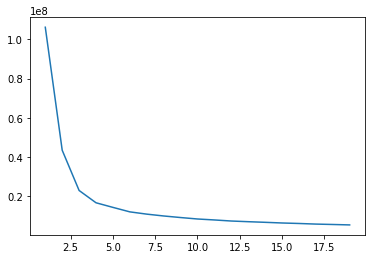

In [22]:
sns.lineplot(x=range(1,20),y=wss)

In [23]:
wss

[106136554.4543689,
 43433028.60757417,
 22917494.348529987,
 16650533.48439923,
 14300660.42627784,
 12017217.385756267,
 10859378.447133832,
 9921902.458695583,
 9124469.61078566,
 8384509.176735339,
 7893428.184227549,
 7350182.308952775,
 7005677.553036613,
 6689406.638977388,
 6348081.3518007025,
 6095756.823532482,
 5787344.337037631,
 5582823.274019008,
 5363256.663693661]

In [24]:
k_means=KMeans(n_clusters=4)

In [25]:
k_means.fit(df)

C:\Users\Samiksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [26]:
k_means.cluster_centers_

array([[ 250.46428571,  172.92857143,   81.32142857, 2077.41071429,
         630.55357143],
       [ 233.72352941,  146.39411765,   79.14117647, 2992.41176471,
         594.84117647],
       [ 231.19379845,  162.13953488,   84.29457364, 2639.84496124,
         612.50387597],
       [ 225.16875   ,  138.25      ,   82.41875   , 3411.0625    ,
         580.2125    ]])

In [27]:
lables = k_means.labels_

In [28]:
import numpy as np
#df = pd.DataFrame({'A': np.random.randn(len(lables)), 'B': np.random.randn(len(lables))})


In [29]:
k_means.inertia_

16650533.48439923

In [30]:
df["label"] = lables

In [31]:
from sklearn.metrics import silhouette_score
silhouette_score(df,lables)

0.4091974482237459

In [32]:
df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,label
0,227,147,111,2460,639,2
1,123,86,65,3510,436,3
2,306,149,76,2570,669,2
3,251,112,129,3650,623,3
4,174,135,128,3400,579,3
...,...,...,...,...,...,...
510,337,140,111,2640,694,2
511,168,131,60,2640,524,2
512,333,86,108,2850,676,1
513,192,176,34,2760,505,2


<Axes: xlabel='Withdrawals', ylabel='label'>

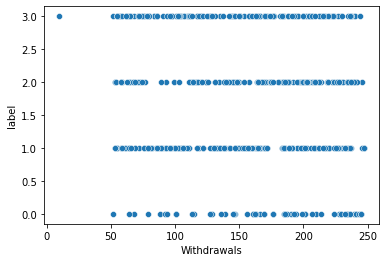

In [33]:
sns.scatterplot(data=df,x='Withdrawals',y='label')

In [34]:
df.mean()

DD                      232.252427
Withdrawals             150.693204
Deposits                 81.687379
Branch Area in sqft    2934.669903
avg daily walkins       598.603883
label                     1.763107
dtype: float64

In [35]:
df = df.groupby('label').mean()

In [36]:
df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
label,,,,,
0,250.464286,172.928571,81.321429,2077.410714,630.553571
1,233.723529,146.394118,79.141176,2992.411765,594.841176
2,231.193798,162.139535,84.294574,2639.844961,612.503876
3,225.168750,138.250000,82.418750,3411.062500,580.212500
